# Titanic: Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew (32.5% survival).

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Using the Following as a Guide

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

## Import Required Libraries and Set Defaults

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
sns.set(style='whitegrid')

## Load Dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64

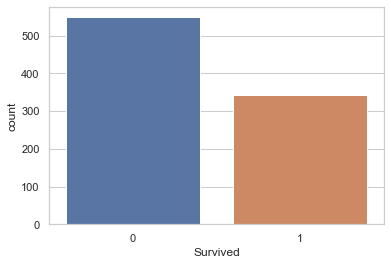

In [7]:
sns.countplot(train['Survived'])
train['Survived'].value_counts()

## Check for Missing Data

In [8]:
total = train.isnull().sum().sort_values(ascending=False)
percentage = train.isnull().sum() / train.isnull().count()*100
percentage = round(percentage, 1).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head()

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


## Search for Correlations

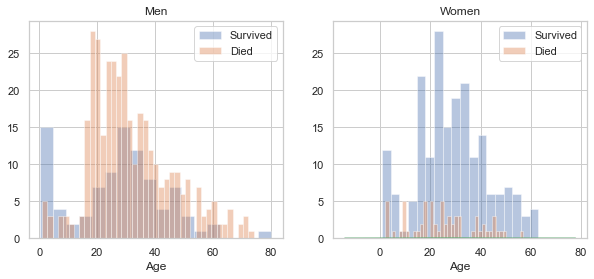

In [9]:
men = train[train['Sex'] == 'male']
women = train[train['Sex'] == 'female']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), ax=axes[0], label='Survived', bins=18, kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), ax=axes[0], label='Died', bins=40, kde=False)
ax.legend()
ax.set_title('Men')

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), ax=axes[1], label='Survived', bins=18, kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), ax=axes[1], label='Died', bins=40, kde=False)
ax.legend()
ax.set_title('Women')

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna())

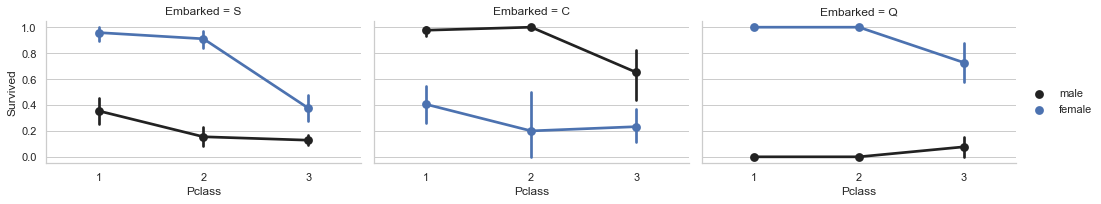

In [10]:
facetgrid1 = sns.FacetGrid(train, col='Embarked', height=3.0, aspect=1.6)
facetgrid1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
facetgrid1.add_legend()

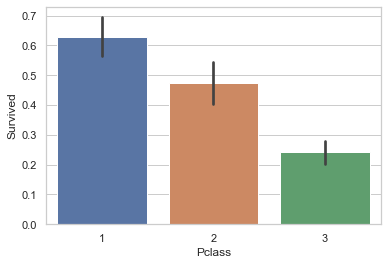

In [11]:
sns.barplot(x='Pclass', y='Survived', data=train)

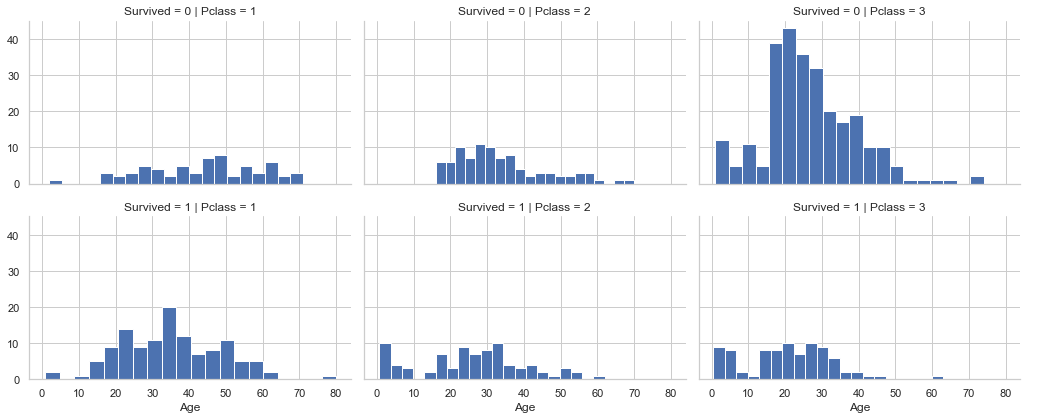

In [12]:
facetgrid2 = sns.FacetGrid(train, row='Survived', col='Pclass', height=3.0, aspect=1.6)
facetgrid2.map(plt.hist, 'Age', bins=20)
facetgrid2.add_legend()

## Feature Engineering: Combine SibSp and Parch

In [13]:
data = [train, test]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Not_alone'] = 1
    dataset.loc[dataset['Relatives'] == 0, 'Not_alone'] = 0
    dataset['Not_alone'] = dataset['Not_alone'].astype(int)

train['Not_alone'].value_counts()

0    537
1    354
Name: Not_alone, dtype: int64

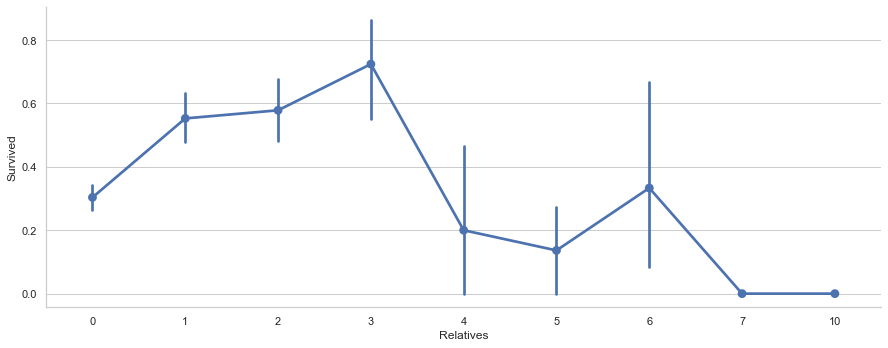

In [14]:
sns.catplot('Relatives', 'Survived', data=train, kind='point', aspect=2.5)

## Data Preprocessing

In [15]:
train = train.drop(['PassengerId'], axis=1)

In [16]:
train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [17]:
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'U':8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [18]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Relatives,Not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,8


In [19]:
data = [train, test]

for dataset in data:
    mean = dataset['Age'].mean()
    std = dataset['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std, size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = dataset['Age'].astype(int)
    
train['Age'].isnull().sum()

0

In [20]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  Relatives  891 non-null    int64  
 11  Not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [23]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
data = [train, test]
titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [25]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
data = [train, test]
genders = {'male':0, 'female':1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [27]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [28]:
data = [train, test]
ports = {'S':0, 'C':1, 'Q':2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,1,8,1
1,1,1,1,38,1,0,71,1,1,1,3,3
2,1,3,1,26,0,0,7,0,0,0,8,2
3,1,1,1,35,1,0,53,0,1,1,3,3
4,0,3,0,35,0,0,8,0,0,0,8,1


## Creating Categories

In [31]:
data = [train, test]

for dataset in data:
    dataset.loc[dataset['Age']<=11, 'Age'] = 0
    dataset.loc[(dataset['Age']>11) & (dataset['Age']<= 18), 'Age'] = 1
    dataset.loc[(dataset['Age']>18) & (dataset['Age']<= 22), 'Age'] = 2
    dataset.loc[(dataset['Age']>22) & (dataset['Age']<= 27), 'Age'] = 3
    dataset.loc[(dataset['Age']>27) & (dataset['Age']<= 33), 'Age'] = 4
    dataset.loc[(dataset['Age']>33) & (dataset['Age']<= 40), 'Age'] = 5
    dataset.loc[(dataset['Age']>40) & (dataset['Age']<= 66), 'Age'] = 6
    dataset.loc[dataset['Age']>66, 'Age'] = 6
 
train['Age'].value_counts()

6    169
4    163
3    139
5    137
2    123
1     92
0     68
Name: Age, dtype: int64

In [32]:
data = [train, test]

for dataset in data:
    dataset.loc[dataset['Fare']<=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), 'Fare'] = 2
    dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99), 'Fare'] = 3
    dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250), 'Fare'] = 4
    dataset.loc[dataset['Fare']>250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

## Creating New Features

In [33]:
data = [train, test]

for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [37]:
data = [train, test]

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['Relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,1,8,1,6,0
1,1,1,1,5,1,0,3,1,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,0,0,8,2,9,0
3,1,1,1,5,1,0,3,0,1,1,3,3,5,1
4,0,3,0,5,0,0,1,0,0,0,8,1,15,1
5,0,3,0,3,0,0,1,2,0,0,8,1,9,1
6,0,1,0,6,0,0,3,0,0,0,5,1,6,3
7,0,3,0,0,3,1,2,0,4,1,8,4,0,0
8,1,3,1,3,0,2,1,0,2,1,8,3,9,0
9,1,2,1,1,1,0,2,1,1,1,8,3,2,1


## Building the Machine Learning Models

In [41]:
X_train = train.drop(['Survived'], axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId'], axis=1)

### Stochastic Gradient Descent

In [43]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### Random Forest

In [45]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### K Nearest Neighbours

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### Gaussian Naive Bayes

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### Perceptron

In [54]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

### Linear Support Vector Machine

In [58]:
linear_svc = LinearSVC(max_iter=100)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\Malcolm\Anaconda3\envs\kaggle\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Decision Tree

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### The Best Model?

In [60]:
results = pd.DataFrame({
    'Model':['Support Vector Machines', 'KNN', 'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree'],
    'Score':[acc_linear_svc, acc_knn, acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
results_sorted = results.sort_values(by='Score', ascending=False)
results_sorted = results_sorted.set_index('Score')

In [61]:
results_sorted

,Model
Score,
92.70,Random Forest
92.70,Decision Tree
85.30,KNN
80.81,Support Vector Machines
78.34,Perceptron
77.44,Naive Bayes
74.30,Stochastic Gradient Decent


## Prepare csv File For Submission

In [64]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [65]:
Y_pred_rf

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
submission = pd.read_csv('test.csv', index_col='PassengerId')
submission['Survived'] = Y_pred_rf
submission.drop(submisson.columns.difference(['PassengerId', 'Survived']), axis=1, inplace=True)

In [76]:
submission.head(10)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [77]:
submission.count()

Survived    418
dtype: int64

In [78]:
submission.to_csv('submission.csv')